In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
df = pd.read_csv("Saransh_s_Trials.csv")

df["Stance"] = df["Stance"].map({"Square": -1, "Staggered": 1})
df["Focus"]  = df["Focus"].map({"No focus": -1, "Focused": 1})
df["Hand_Placement"] = df["Hand Placement"].map({"Off seam": -1, "On seam": 1})

DF = df[["Stance", "Focus", "Hand_Placement", "Accuracy"]]
DF

,Stance,Focus,Hand_Placement,Accuracy
0,1,-1,-1,50
1,1,1,1,50
2,-1,-1,-1,60
3,1,-1,1,20
4,-1,-1,1,50
5,1,1,-1,50
6,-1,1,-1,40
7,-1,1,1,60


In [11]:
model=ols('Accuracy~Stance*Focus+Stance*Hand_Placement+Focus*Hand_Placement',data=DF)
results1=model.fit()  
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.301e+28
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           3.05e-15
Time:                        18:15:56   Log-Likelihood:                 241.20
No. Observations:                   8   AIC:                            -468.4
Df Residuals:                       1   BIC:                            -467.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                47.50

In [13]:
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF).fit()
results2=model.summary2()
print(results2)

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.293 
Dependent Variable: Accuracy         AIC:                68.0294
Date:               2025-04-17 18:15 BIC:                68.3471
No. Observations:   8                Log-Likelihood:     -30.015
Df Model:           3                F-statistic:        0.4706 
Df Residuals:       4                Prob (F-statistic): 0.719  
R-squared:          0.261            Scale:              212.50 
----------------------------------------------------------------
                 Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------
Intercept       47.5000   5.1539  9.2164 0.0008  33.1905 61.8095
Stance          -5.0000   5.1539 -0.9701 0.3869 -19.3095  9.3095
Focus            2.5000   5.1539  0.4851 0.6530 -11.8095 16.8095
Hand_Placement  -2.5000   5.1539 -0.4851 0.6530 -16.8095 11.8095
------------------------------------------

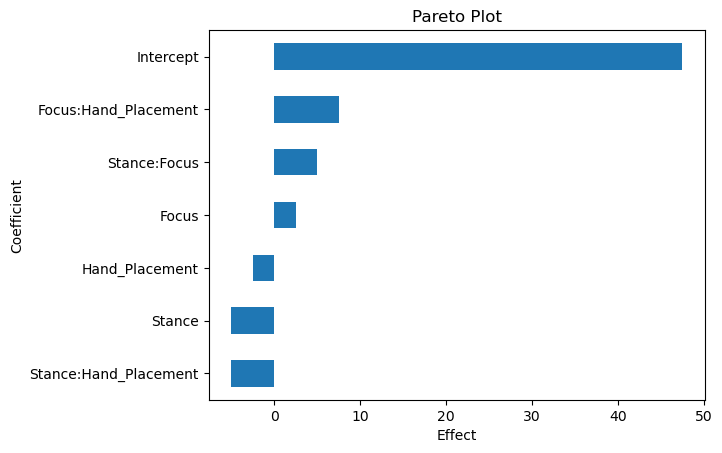

In [15]:
plt.clf()
ordered_coefficients = results1.params
ordered_coefficients=ordered_coefficients.sort_values(axis=0, ascending=True)
ordered_coefficients.plot.barh()
plt.title('Pareto Plot')
plt.xlabel('Effect')
plt.ylabel('Coefficient')
plt.show()

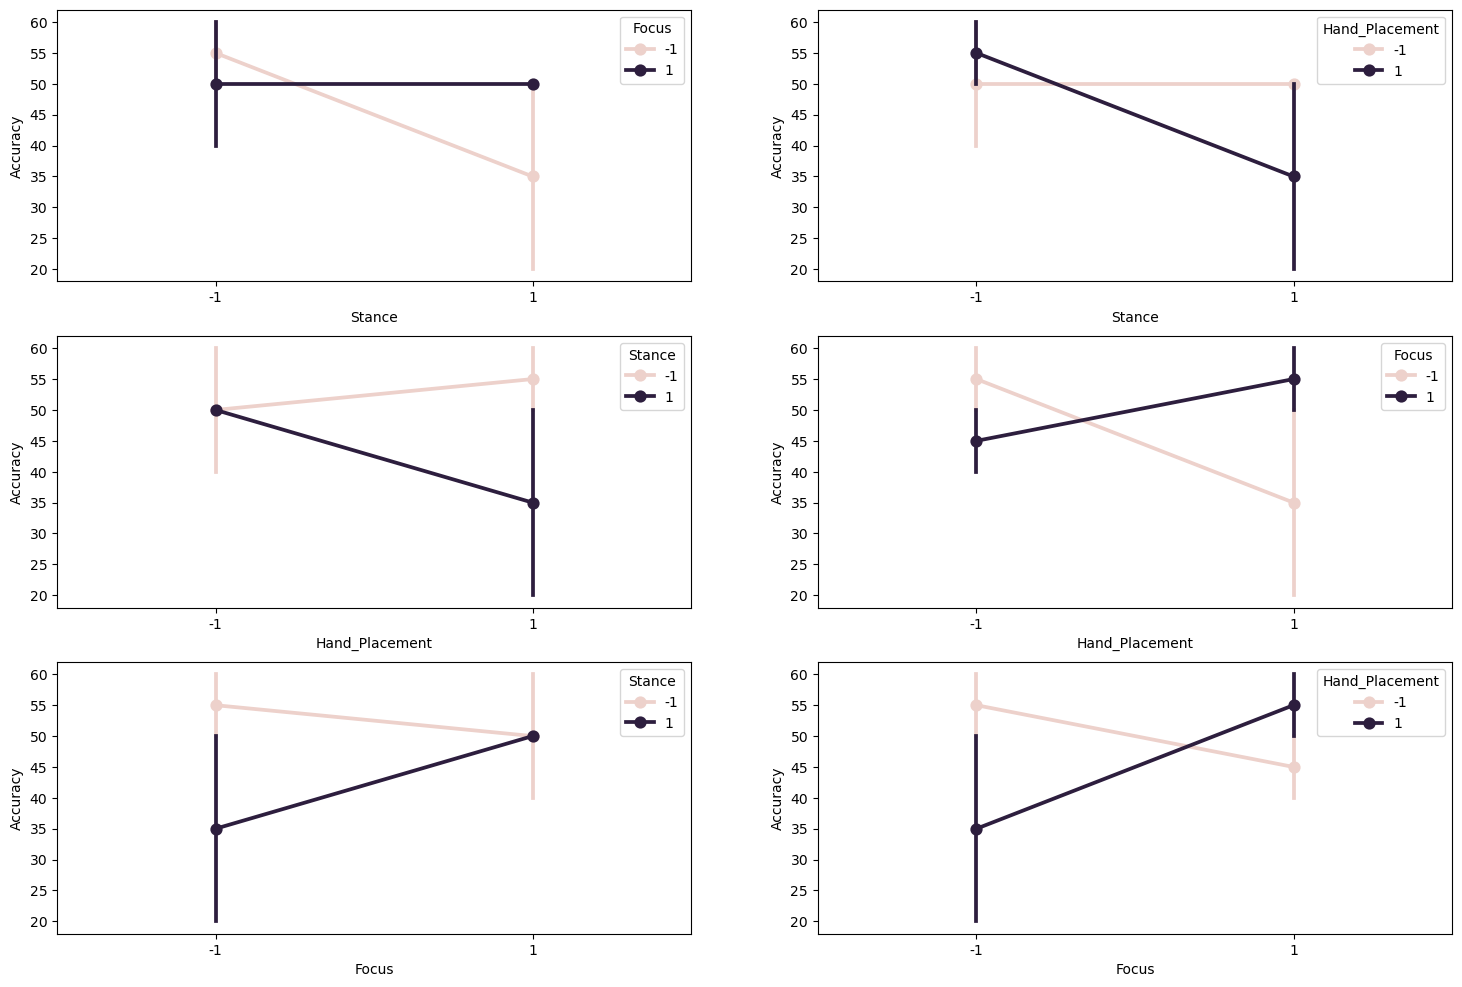

In [17]:
#interaction plots
fig, ax =plt.subplots(3,2)
fig.set_size_inches(18, 12)
sns.pointplot(x='Stance',y='Accuracy',hue='Focus',data=DF,ax=ax[0,0])
sns.pointplot(x='Stance',y='Accuracy',hue='Hand_Placement',data=DF,ax=ax[0,1])
sns.pointplot(x='Hand_Placement',y='Accuracy',hue='Stance',data=DF,ax=ax[1,0])
sns.pointplot(x='Hand_Placement',y='Accuracy',hue='Focus',data=DF,ax=ax[1,1])
sns.pointplot(x='Focus',y='Accuracy',hue='Stance',data=DF,ax=ax[2,0])
sns.pointplot(x='Focus',y='Accuracy',hue='Hand_Placement',data=DF,ax=ax[2,1])
plt.show()

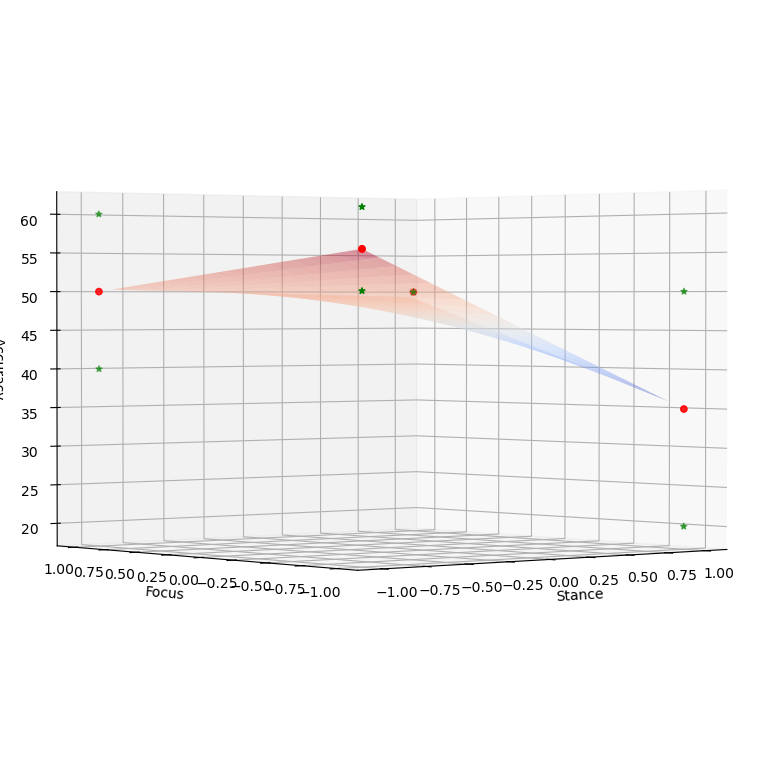

In [18]:
# Contour plot for data between Stance and Focus 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Stance']
y=df['Focus']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})

model3=ols('Accuracy~Stance*Focus',data=DF)
results3=model3.fit()

zS=results3.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results3.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Stance")
ax.set_ylabel("Focus")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()


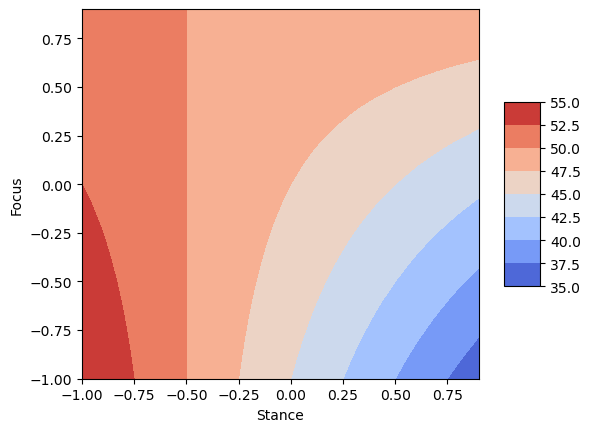

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults3=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults3,shrink=0.5, aspect=5)
ax.set_xlabel("Stance")
ax.set_ylabel("Focus")
plt.show()


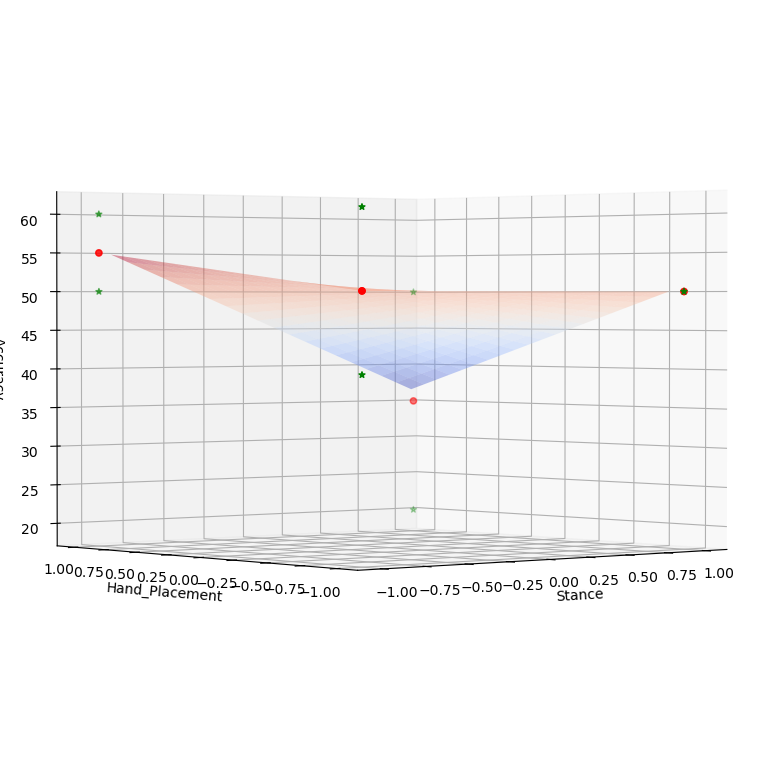

In [20]:
# Contour plot for data between Stance and Hand Placement 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Stance']
y=df['Hand_Placement']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x1: xS.ravel(), x3:yS.ravel()})

model4=ols('Accuracy~Stance*Hand_Placement',data=DF)
results4=model4.fit()

zS=results4.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results4.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Stance")
ax.set_ylabel("Hand_Placement")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()


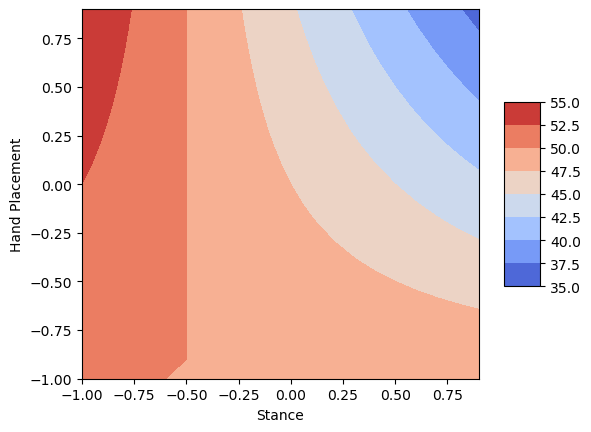

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults4=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults4,shrink=0.5, aspect=5)
ax.set_xlabel("Stance")
ax.set_ylabel("Hand Placement")
plt.show()


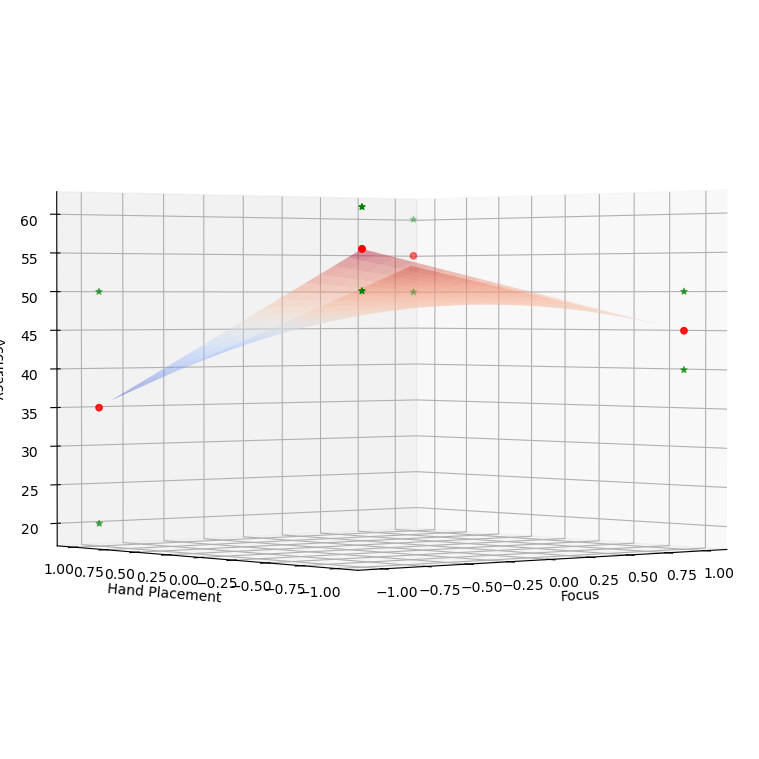

In [25]:
# Contour plot for data between Focus and Hand Placement 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Focus']
y=df['Hand_Placement']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x2: xS.ravel(), x3:yS.ravel()})

model5=ols('Accuracy~Focus*Hand_Placement',data=DF)
results5=model5.fit()

zS=results5.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results5.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Focus")
ax.set_ylabel("Hand Placement")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()


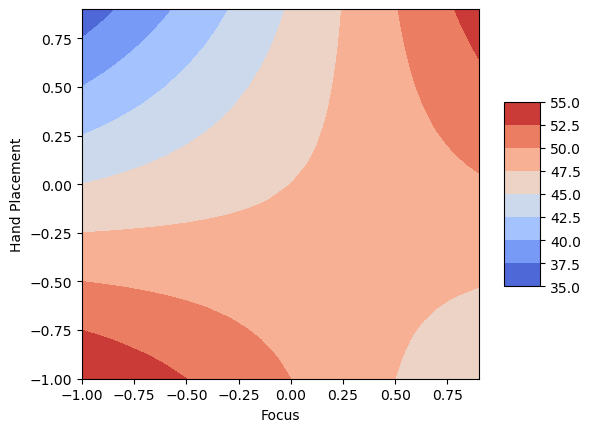

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults5=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults5,shrink=0.5, aspect=5)
ax.set_xlabel("Focus")
ax.set_ylabel("Hand Placement")
plt.show()
